In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from numpy import mean, absolute
from scipy import stats

In [2]:
data = pd.read_csv("hgmd.raw.matrix.csv")
data['phenotype'] = data['phenotype'] + ' (chr' + data['CHROM_hg19'].astype(str) + ':' + data['POS_hg19'].astype(str) +  ', ' + data['REF'].astype(str) + ' to ' + data['ALT'].astype(str) +  ')'

In [3]:
data1 = data.iloc[:,9:]
data1.drop(data1.iloc[:, 1:3], axis = 1, inplace = True)
data2 = data1.set_index('phenotype')

In [4]:
def figure_create(data):
    s1 = np.reshape(data.columns.values.tolist(), (10, 4)).tolist()

    fig, axes = plt.subplots(10, 4, sharex=True, figsize=(30,60))
    fig.suptitle('Distribution of Variance Effects from Each Sequence Class', fontsize = 25) 
    
    for i in range (0, len(s1)):
        for j in range (0, len(s1[0])):
            name = s1[i][j]
            dataframe = pd.DataFrame(data, columns = [name])
            
            # Calculate spread values
            d = dataframe.values.tolist()
            std = np.std(d, dtype=np.float64)
            r = np.ptp(d)
            m = mean(absolute(d - mean(d)))
            iqr = stats.iqr(d, interpolation = 'midpoint')
            title = f"{name}\nstd: {std:.4f}, range: {r:.4f}, MAD: {m:.4f}, IQR: {iqr:.4f} "
            
            sb.histplot(data = dataframe, x = name, ax = axes[i, j])
            axes[i, j].set_xlabel("Variant effect scores")
            axes[i, j].set_ylabel("Count")
            axes[i, j].set_title(title)
    

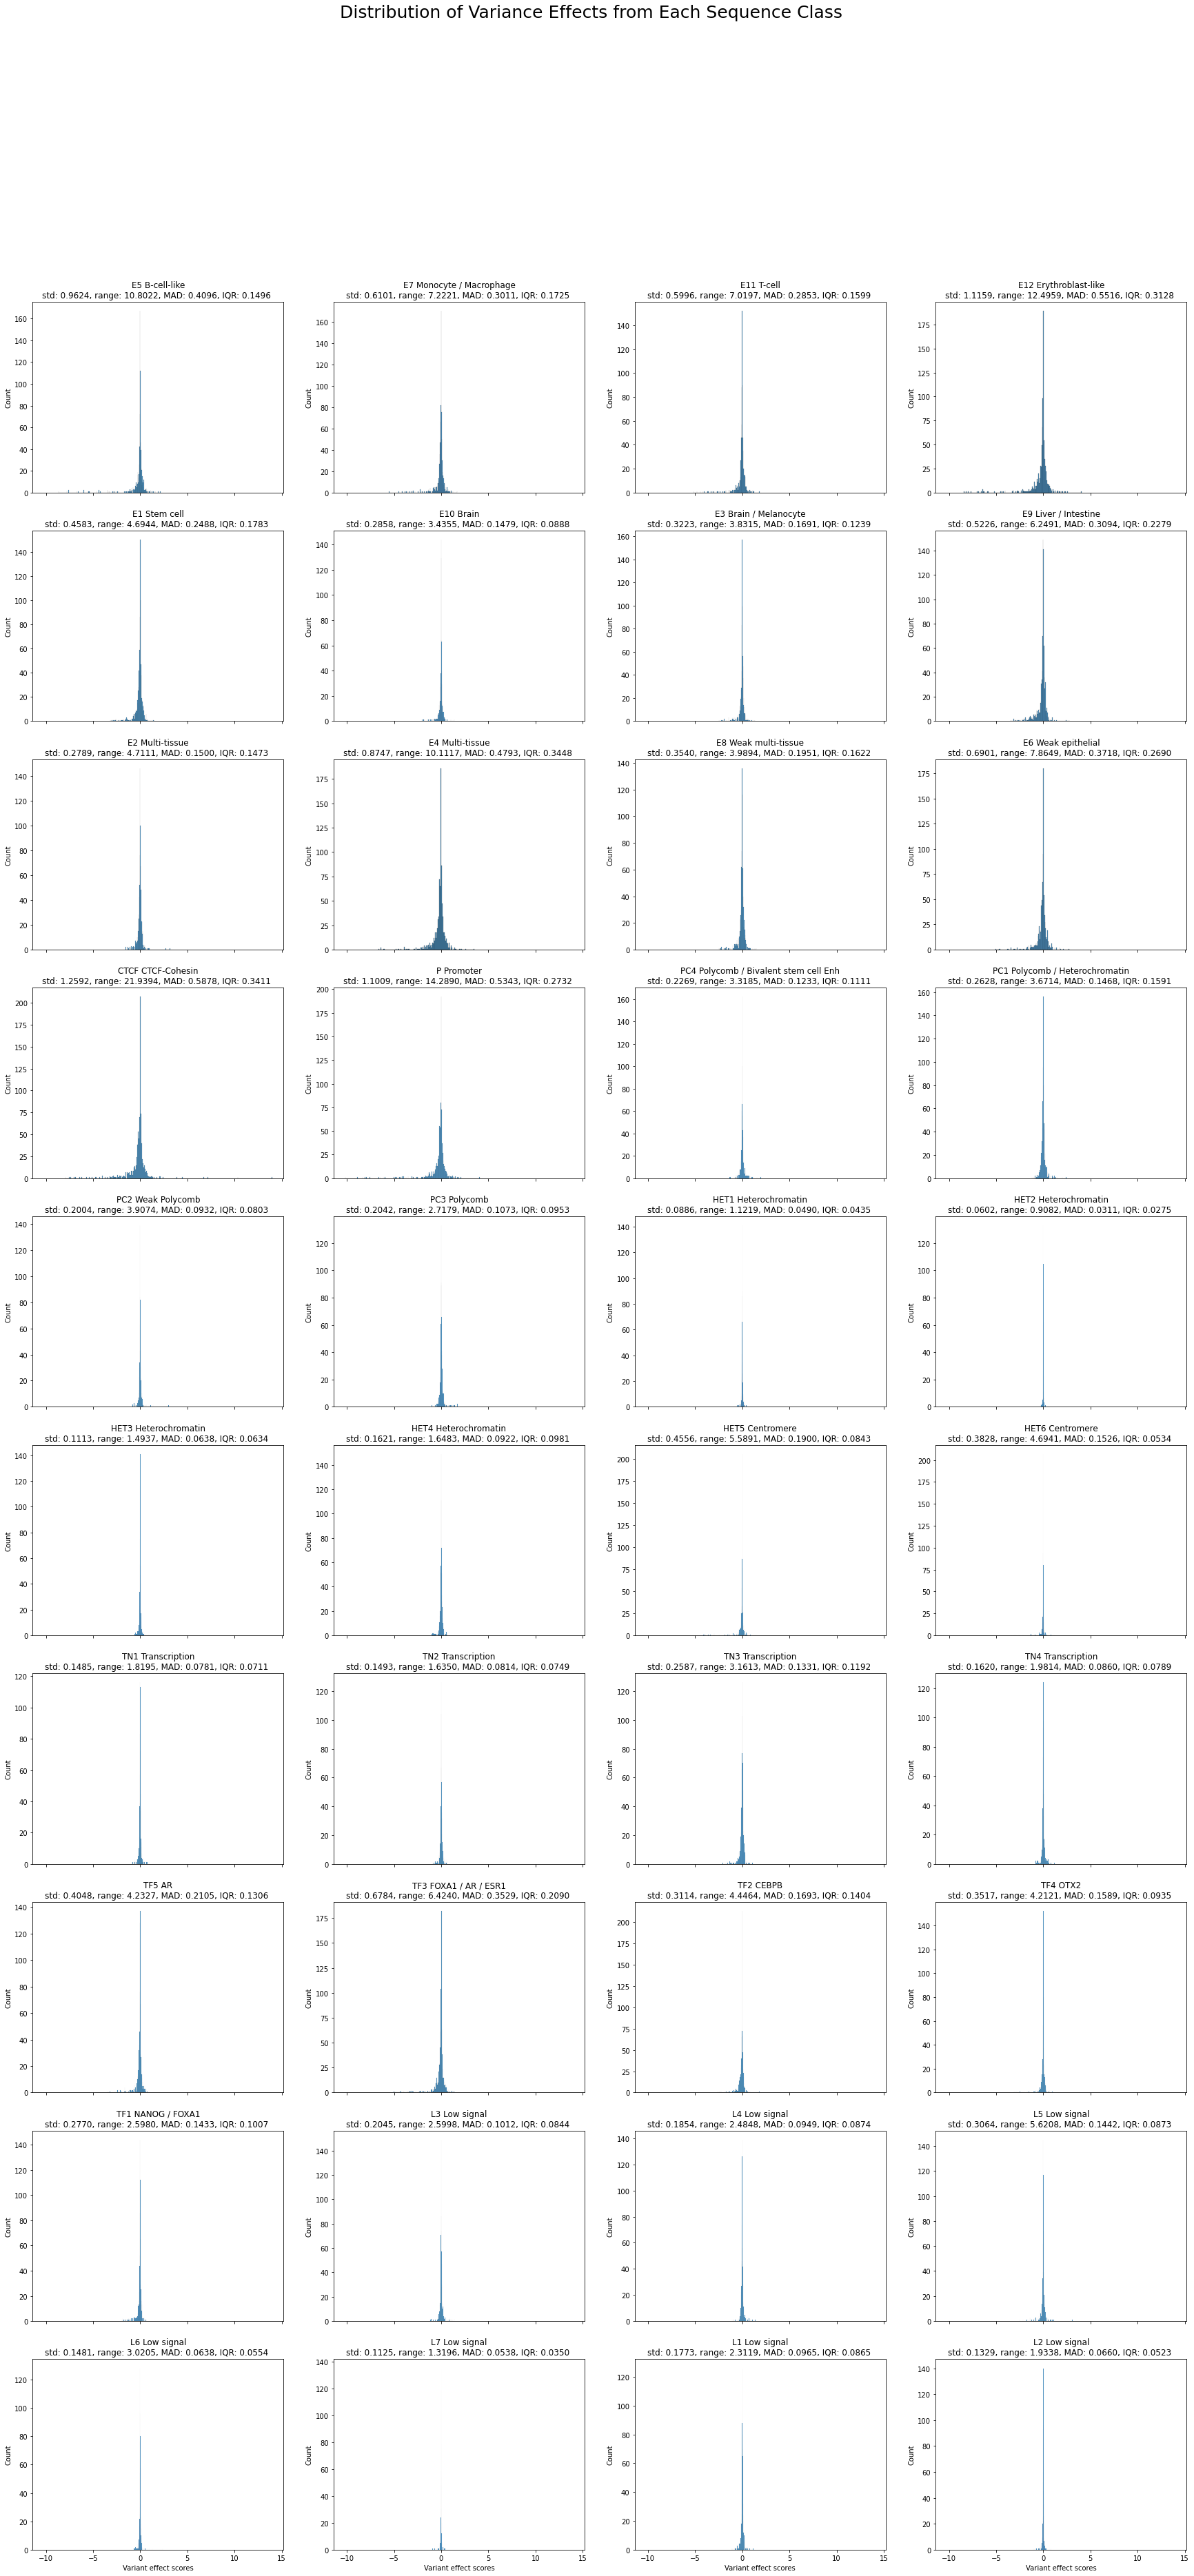

In [5]:
figure_create(data2)